# Rendering quality plots in Kenning

In [2]:
!pip install git+https://github.com/antmicro/kenning.git

  Cloning https://github.com/antmicro/kenning.git to /tmp/pip-req-build-95ek5lpy
  Running command git clone -q https://github.com/antmicro/kenning.git /tmp/pip-req-build-95ek5lpy
  Created wheel for kenning: filename=kenning-0.0.1-py3-none-any.whl size=141569 sha256=d84343f96c15a45be3918388e83a89841bf05c6f7e3249a244ec48a1eb40e8e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-pibktfmx/wheels/07/0b/4b/88e35ff0a3b14e5f5e6284573fad6e848ad407a6bd2b3e42f2
Successfully built kenning


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
from kenning.core import drawing
from pathlib import Path

## Rendering confusion matrix

To draw a confusion matrix, use `draw_confusion_matrix` from `kenning.core.drawing` module.

Let's see the help for the method:

In [5]:
help(drawing.draw_confusion_matrix)

Help on function draw_confusion_matrix in module kenning.core.drawing:

draw_confusion_matrix(confusion_matrix: numpy.ndarray, outpath: Union[pathlib.Path, NoneType], title: str, class_names: List[str], cmap=None, figsize: Union[Tuple, NoneType] = None, dpi: Union[int, NoneType] = None)
    Creates a confusion matrix plot.
    
    Parameters
    ----------
    confusion_matrix : ArrayLike
        Square numpy matrix containing the confusion matrix.
        0-th axis stands for ground truth, 1-st axis stands for predictions
    outpath : Optional[Path]
        Path where the plot will be saved. If None, the plot will be displayed.
    title : str
        Title of the plot
    class_names : List[str]
        List of the class names
    cmap : Any
        Color map for the plot
    figsize : Optional[Tuple]
        The size of the plot
    dpi : Optional[int]
        The dpi of the plot



To keep the consistent style of the plot, only changing `confusion_matrix`, `outpath`, `title` and `class_names` is necessary.

`outpath` can be:

* `Path` object - the plot will be saved in the given path
* `None` - the plot will be displayed using matplotlib rendering

`confusion_matrix` is an `NxN` numpy array, where `N` is the number of classes.

The number on `(m,n)` coordinate represents number of objects of class `m` (0th axis is ground truth, which were assigned by the model to class `n` (1st axis is prediction).

Let's generate some sample confusion-like matrix:

In [10]:
num_classes = 37

confusion_matrix = np.diag(np.full(num_classes, num_classes * 10)) + np.random.randint(0, 20, (num_classes, num_classes))

confusion_matrix

array([[382,  15,  19, ...,  11,  11,  17],
       [ 15, 383,  16, ...,   6,  14,  17],
       [  2,  17, 379, ...,  15,   8,   9],
       ...,
       [ 12,   3,   6, ..., 389,  10,  11],
       [  6,   2,   3, ...,   1, 378,  19],
       [ 14,  16,   9, ...,   0,  18, 377]])

Now, to draw the function, just call the draw function with a given confusion matrix:

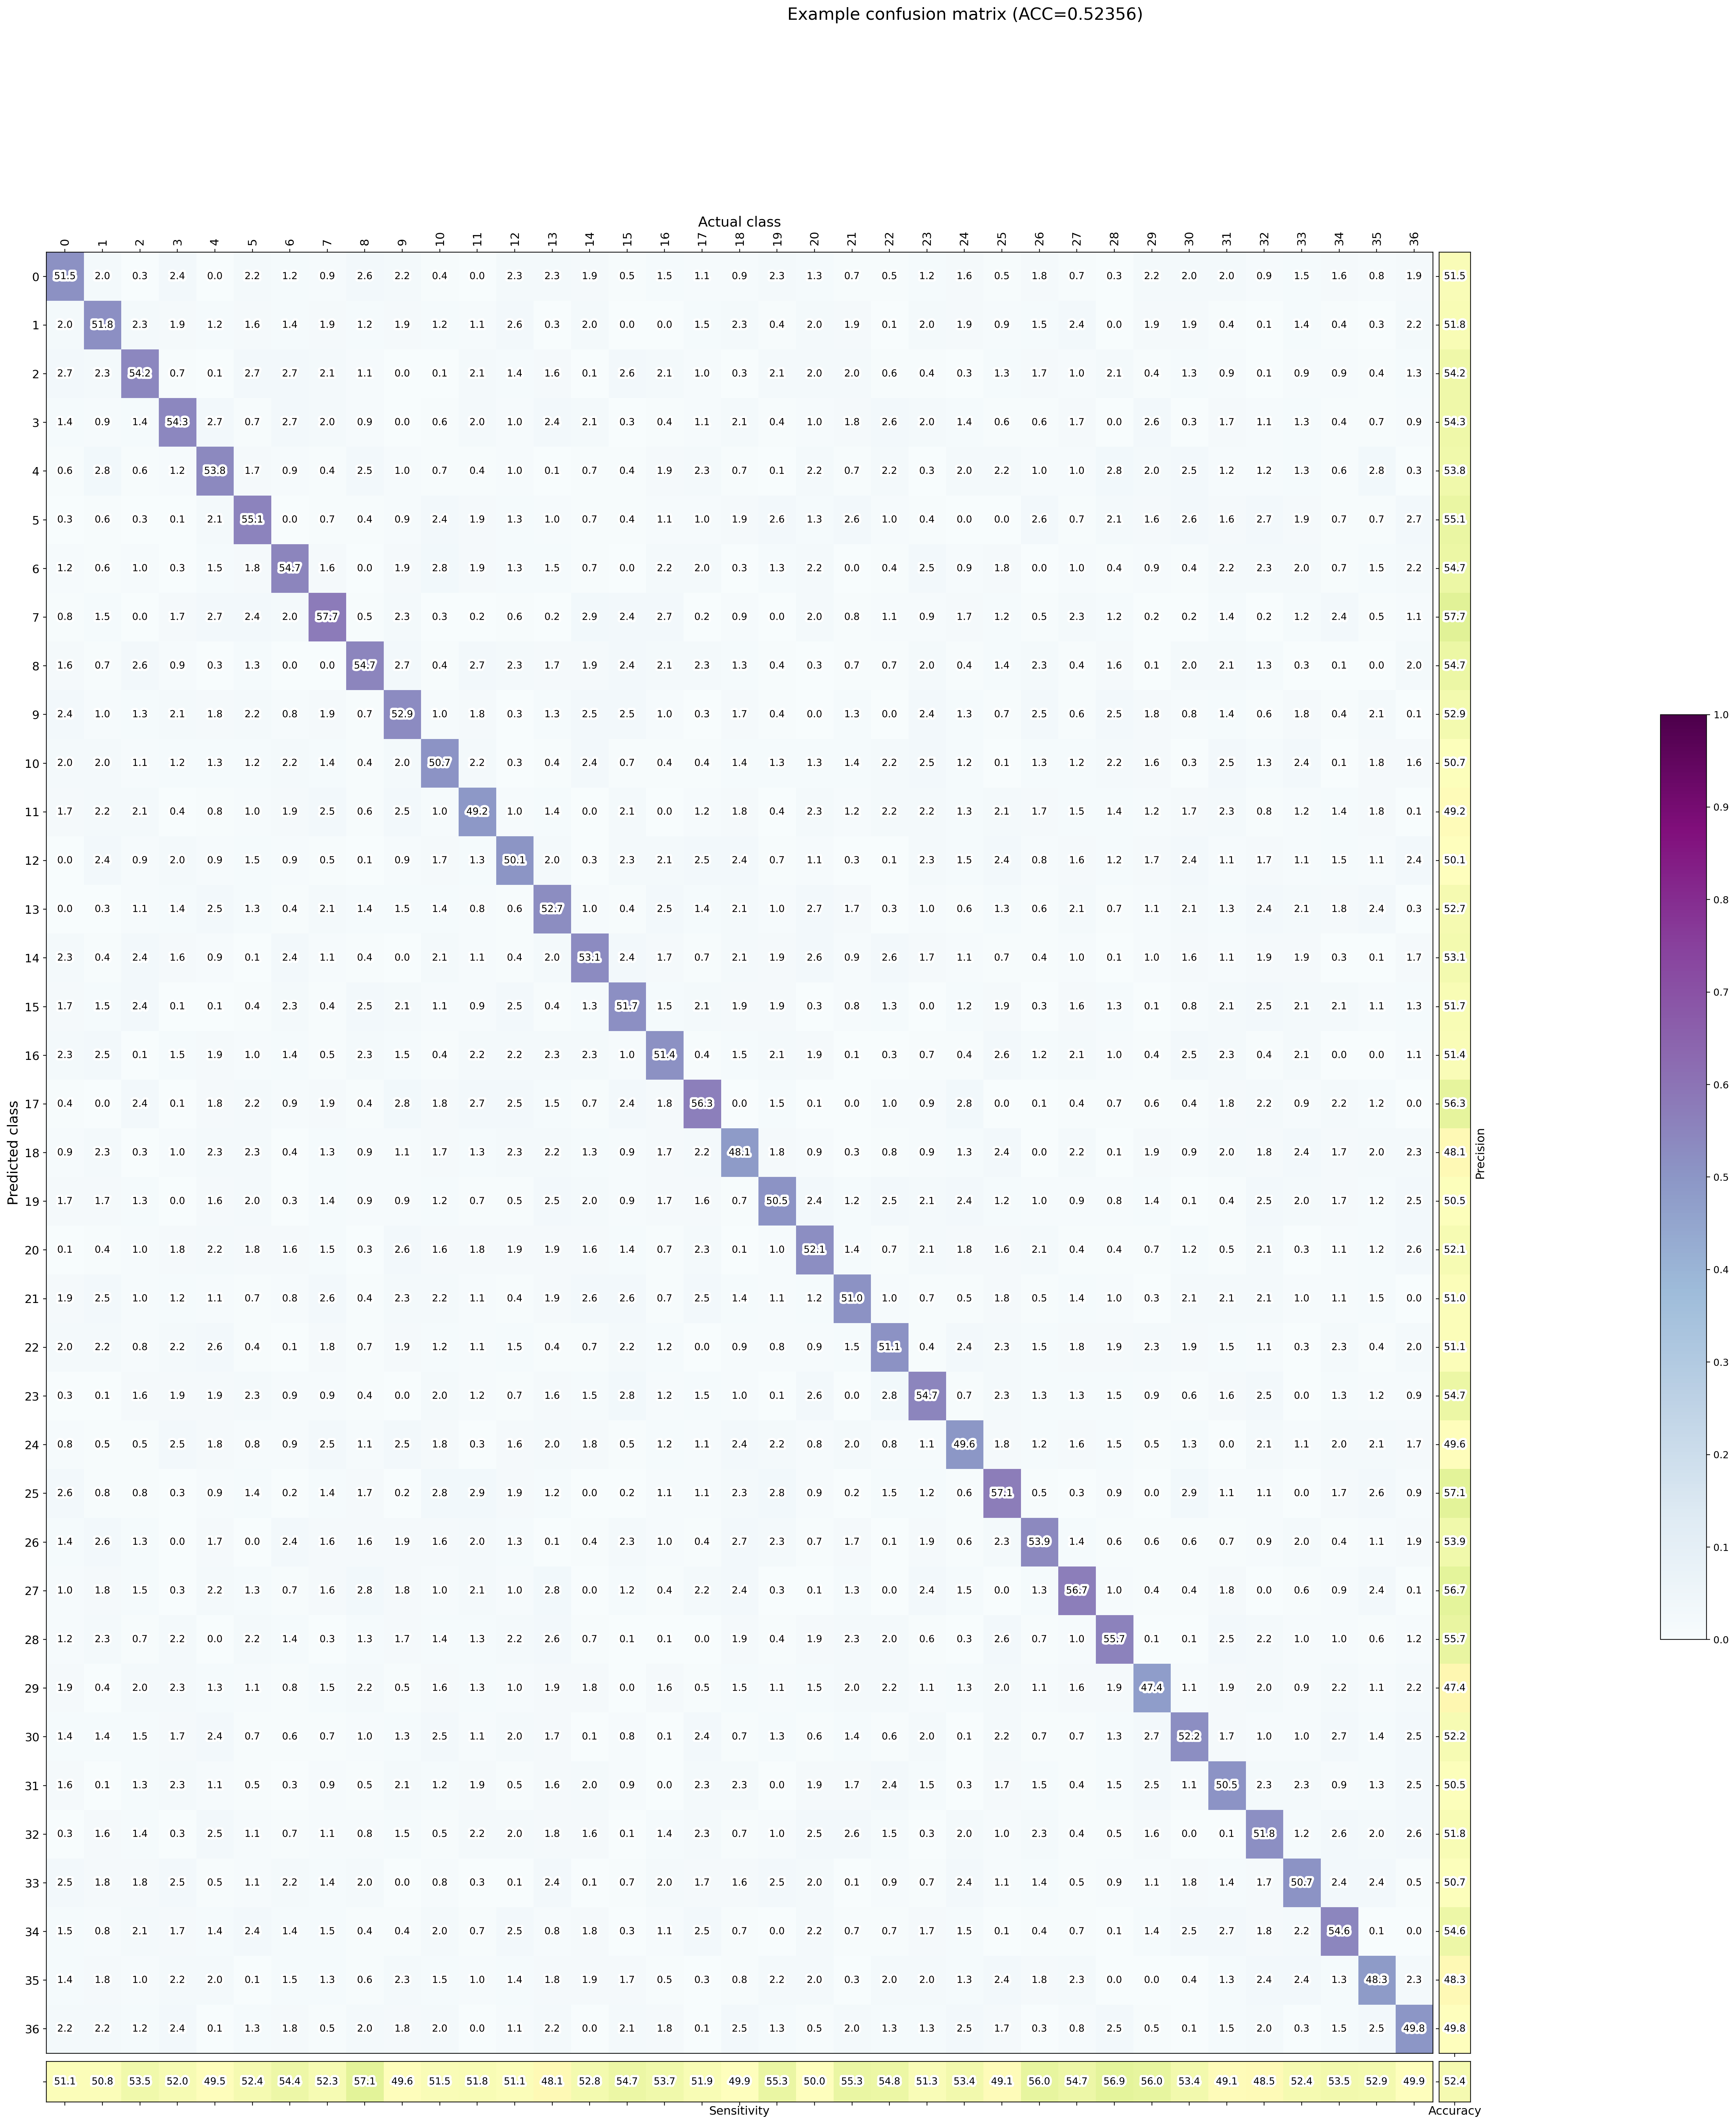

In [11]:
drawing.draw_confusion_matrix(
    confusion_matrix,
    None,
    'Example confusion matrix',
    [i for i in range(num_classes)]
)

`NOTE`: For problems with over 50 classes (such as ImageNet), the confusion matrix plot is represented in a simplified form, using more aggressive gradient (in order to have some interpretable results)

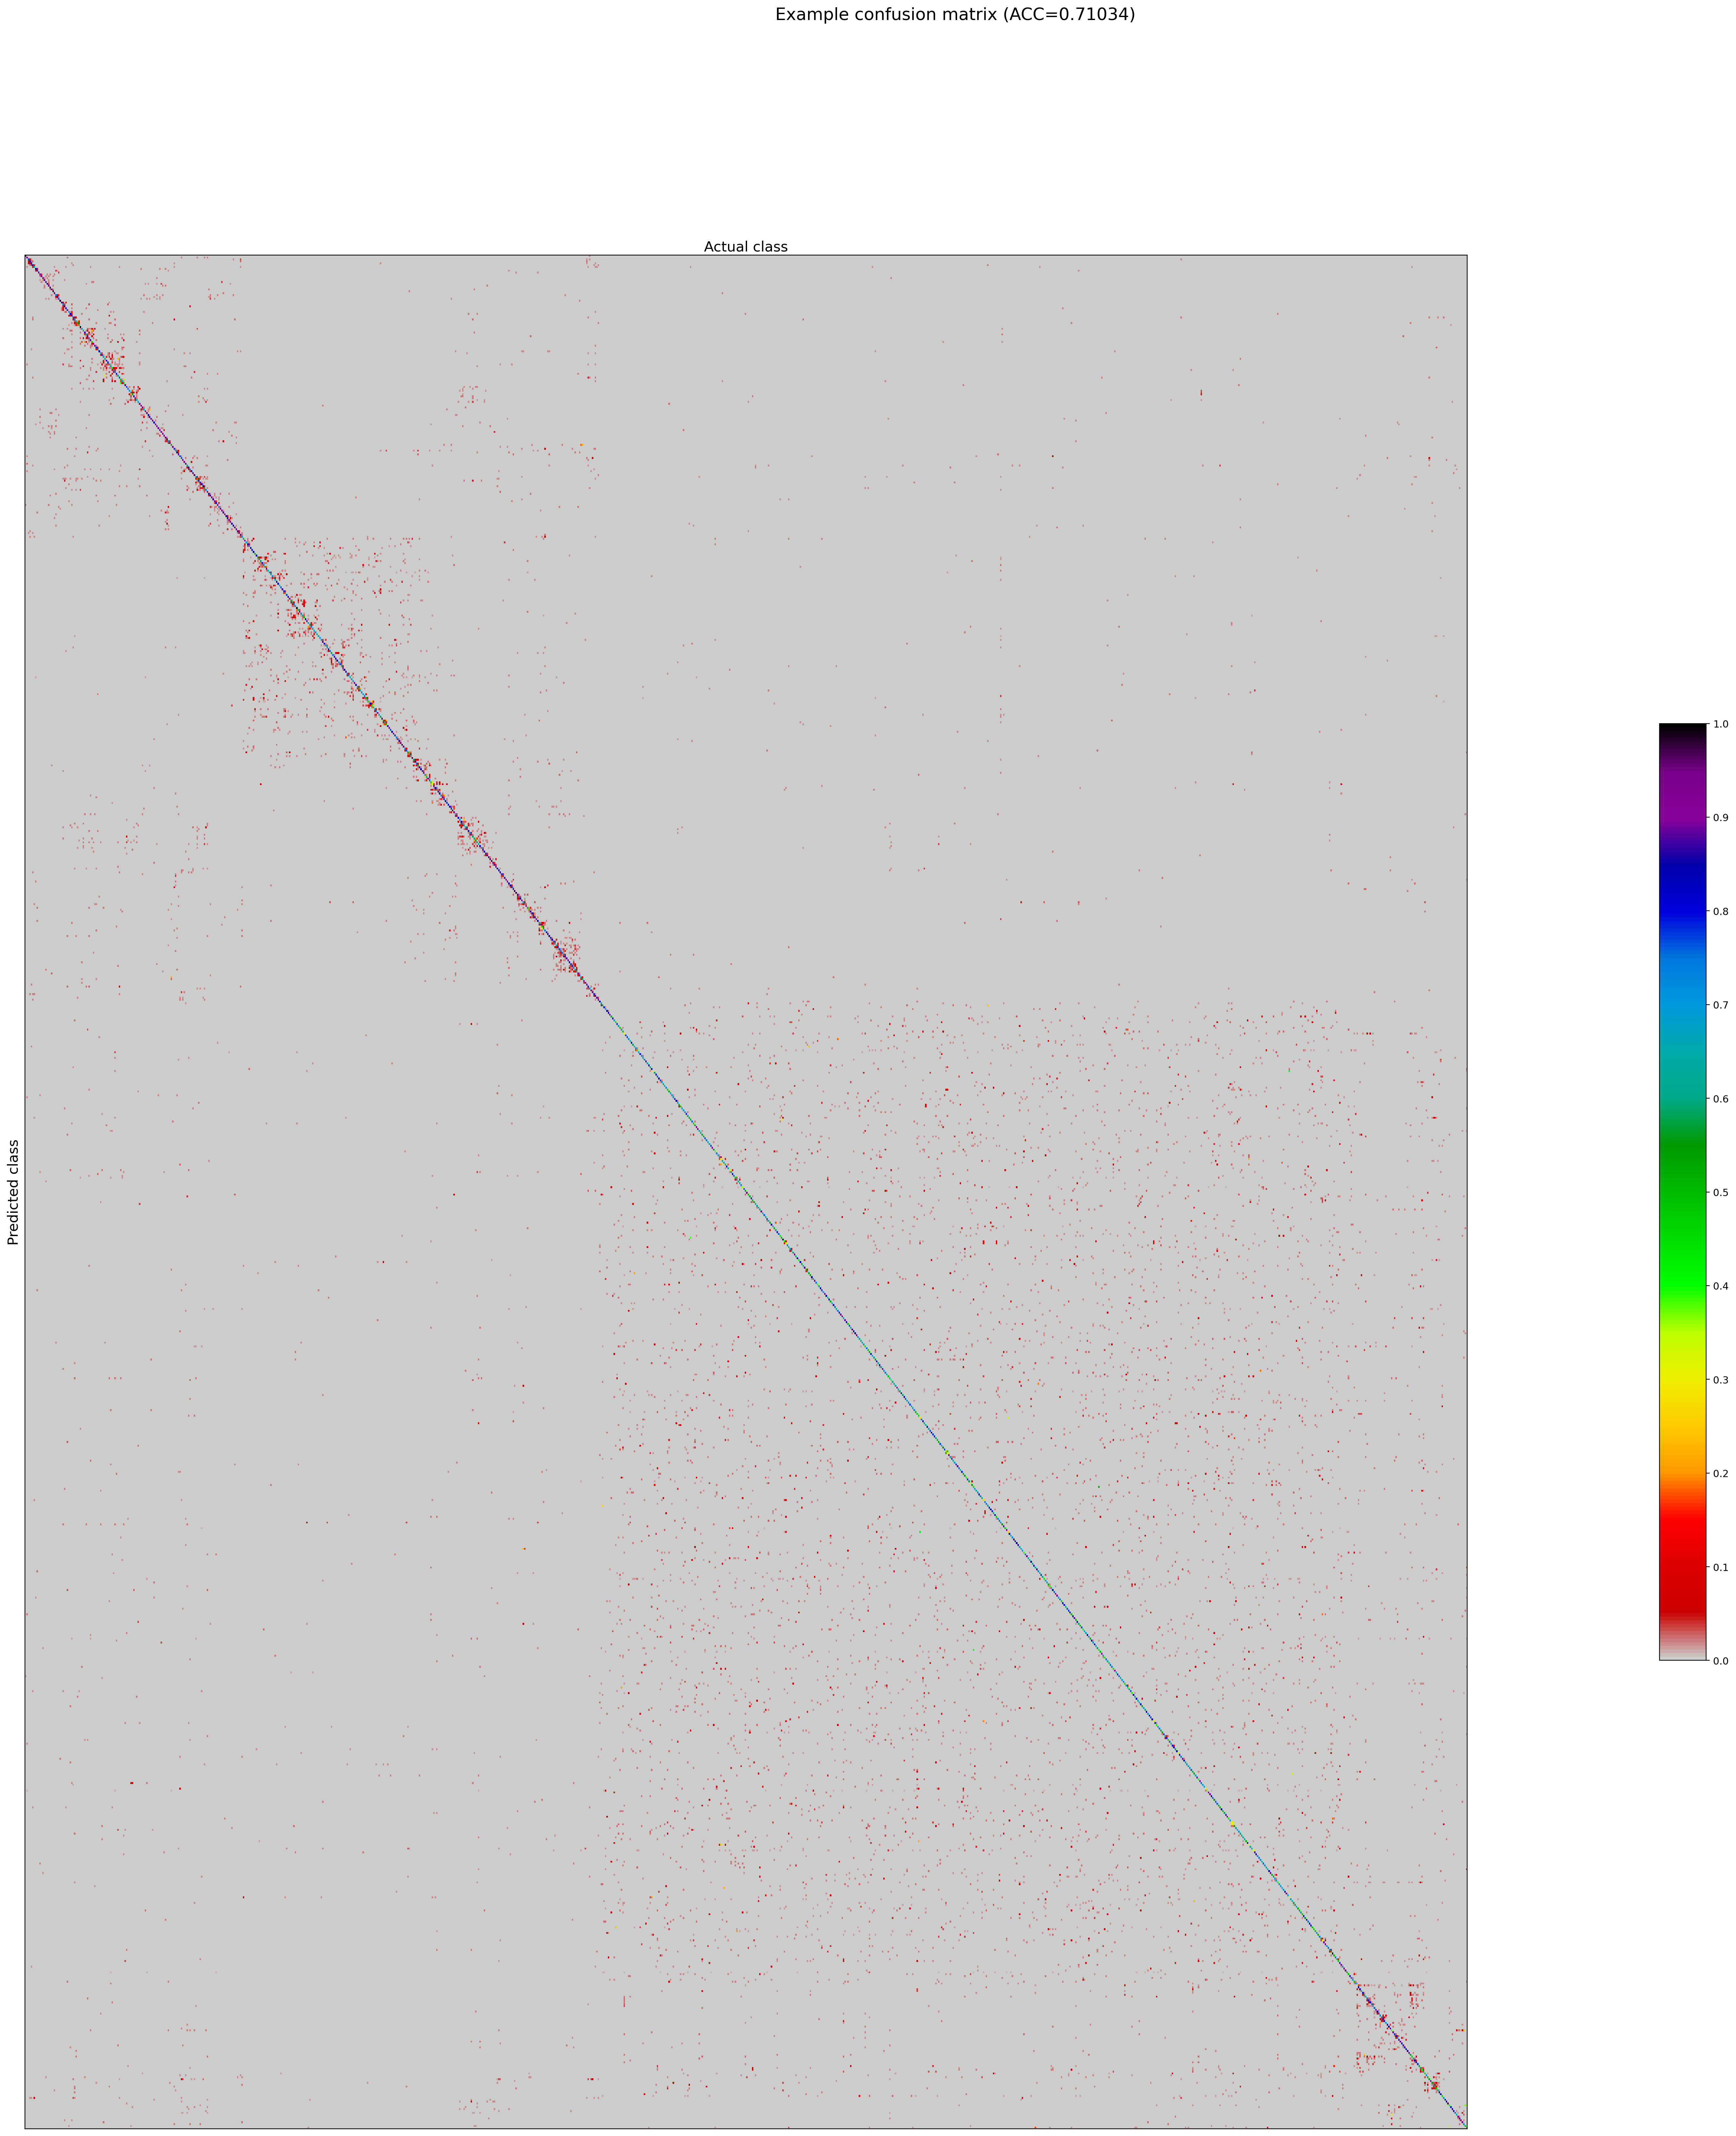

In [16]:
import numpy as np
from kenning.core import drawing
from pathlib import Path

num_classes = 1000

#confusion_matrix = np.diag(np.full(num_classes, num_classes * 10)) + np.random.randint(0, 20, (num_classes, num_classes))
confusion_matrix = np.loadtxt('./imagenet/conf_mat.txt')

drawing.draw_confusion_matrix(
    confusion_matrix,
    None,
    'Example confusion matrix',
    [i for i in range(num_classes)]
)

## Rendering plots for object detection

There are several methods for visualizing performance of the object detection task:

In [9]:
help(drawing.recall_precision_curves)

Help on function recall_precision_curves in module kenning.core.drawing:

recall_precision_curves(outpath: Union[pathlib.Path, NoneType], title: str, lines: List[Tuple[List, List]], class_names: List[str], figsize: Tuple = (15, 15))
    Draws Recall-Precision curves for AP measurements.
    
    Parameters
    ----------
    outpath : Optional[Path]
        Output path for the plot image. If None, the plot will be displayed.
    title : str
        Title of the plot
    lines : List[List[List]]
        Per-class list of tuples with list of recall values and precision
        values
    class_names : List[str]
        List of the class names
    figsize: Tuple
        The size of the figure



In [10]:
help(drawing.true_positive_iou_histogram)

Help on function true_positive_iou_histogram in module kenning.core.drawing:

true_positive_iou_histogram(outpath: Union[pathlib.Path, NoneType], title: str, lines: List[float], class_names: List[str], figsize: Tuple = (10, 25))
    Draws per-class True Positive IoU precision plot
    
    Parameters
    ----------
    outpath : Optional[Path]
        Output path for the plot image. If None, the plot will be displayed.
    title : str
        Title of the plot
    lines : List[float]
        Per-class list of floats with IoU values
    class_names : List[str]
        List of the class names
    figsize: Tuple
        The size of the figure



In [11]:
help(drawing.true_positives_per_iou_range_histogram)

Help on function true_positives_per_iou_range_histogram in module kenning.core.drawing:

true_positives_per_iou_range_histogram(outpath: Union[pathlib.Path, NoneType], title: str, lines: List[float], range_fraction: float = 0.05, figsize: Tuple = (10, 10))
    Draws histogram of True Positive IoU values
    
    Parameters
    ----------
    outpath : Optional[Path]
        Output path for the plot image. If None, the plot will be displayed.
    title : str
        Title of the plot
    lines : List[float]
        All True Positive IoU values
    range_fraction : float
        Fraction by which the range should be divided (1/number_of_segments)
    figsize: Tuple
        The size of the figure



In [12]:
help(drawing.recall_precision_gradients)

Help on function recall_precision_gradients in module kenning.core.drawing:

recall_precision_gradients(outpath: Union[pathlib.Path, NoneType], title: str, lines: List[Tuple[List, List]], class_names: List[str], aps: List[float], figsize: Tuple = (10, 25))
    Draws per-class gradients of precision dependent to recall.
    
    Provides per-class AP and mAP values.
    
    Parameters
    ----------
    outpath : Optional[Path]
        Output path for the plot image. If None, the plot will be displayed.
    title : str
        Title of the plot
    lines : List[Tuple[List, List]]
        Per-class list of tuples with list of recall values and precision
        values
    class_names : List[str]
        List of the class names
    aps: List[float]
        Per-class AP values
    figsize: Tuple
        The size of the figure



All of the above methods require results from evaluating the predictions.

Instead of using the above methods directly, we will use a `generate_report` method responsible for rendering a report, that will run all of the above methods with converted data.

### Converting the files for evaluation for rendering purposes

To simplify the process of creating the plots, let's use the same format of inputs that is used for evaluation scripts.

We will use the predictions to compute evaluation metrics using the Kenning's COCO dataset wrapper, and then we'll render the graphs.

Please provide the path to the:

* `COCO_PREDICTIONS` - file with COCO predictions,
* `COCO_DATASET_ROOT` - path to the directory with COCO dataset. The dataset can be either provided, or (more secure) downloaded by Kenning and organized in expected order
* `DOWNLOAD_DATASET` - `True` if dataset should be downloaded, `False` otherwise
* `OUTPUT_EVALUATION` - path to the output JSON file where the data for drawing plots will be stored

In [6]:
COCO_PREDICTIONS = '/media/SSD2TB/wd/vedliot/trt_accuracy_eval/coco/yolov4_8_predictions.json'
COCO_DATASET_ROOT = '/media/SSD2TB/wd/vedliot/D3.3_Accuracy_Evaluation/coco/coco_kenning'
DOWNLOAD_DATASET = False
OUTPUT_EVALUATION = './build/eval_data.json'

First, we create the COCODataset2017 object, and optionally download the dataset (this step may take a while)

In [7]:
import json
from collections import defaultdict
from kenning.datasets.coco_dataset import COCODataset2017
from kenning.datasets.helpers.detection_and_segmentation import DectObject
from kenning.core.measurements import Measurements

In [8]:
dataset = COCODataset2017(
    root=COCO_DATASET_ROOT,
    download_dataset=DOWNLOAD_DATASET
)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


Now, let's load COCO predictions

In [9]:
with open(COCO_PREDICTIONS, 'r') as coco_preds_f:
    coco_preds = json.load(coco_preds_f)

In [10]:
def convert_eval_entries_to_kenning_eval(dataset, cocoeval):
    """
    Converts predictions for the object detection task
    to format applicable for evaluation plots.
    
    Parameters
    ----------
    dataset : COCODataset2017
        Dataset object with data handling and evaluation metrics
    cocoeval : List[Dict]
        Prediction entries for COCO dataset evaluation
    """
    # Firstly, let's group prediction entries by images they belong to.
    # COCODataset2017, as well as other object detection datasets in
    # Kenning use DectObject objects as representation of entries.
    grouped_entries = defaultdict(list)
    for entry in cocoeval:
        width = dataset.coco.imgs[entry['image_id']]['width']
        height = dataset.coco.imgs[entry['image_id']]['height']
        bbox = entry['bbox']
        
        grouped_entries[entry['image_id']].append(
            DectObject(
                clsname=dataset.classnames[entry['category_id']],
                xmin=bbox[0] / width,
                ymin=bbox[1] / height,
                xmax=(bbox[0] + bbox[2]) / width,
                ymax=(bbox[1] + bbox[3]) / height,
                score=entry['score']
            )
        )
    # After grouping predictions, and converting them to DectObjects,
    # we create a Measurements object - it is a bag for various quality
    # and performance metrics used throughout Kenning.
    # Dataset's evaluate method use it to store evaluation results.
    measurements = Measurements()
    
    # from this point, we iterate over image IDs and ground truth
    # to evaluate predictions.
    for X, y in zip(dataset.dataX, dataset.dataY):
        measurements += dataset.evaluate(
            [grouped_entries[X]],
            dataset.prepare_output_samples([y])
        )
    # in the end, we additionally save the class names
    measurements += {'class_names': dataset.classnames}
    return measurements.data

In the end, we convert the evaluation entries using the above function:

In [11]:
data = convert_eval_entries_to_kenning_eval(dataset, coco_preds)

Data format looks as below

In [12]:
data

{'eval_det/person': [[0.9949908082590054, 1.0, 0.9031119818039606],
  [0.29505309252925116, 0.0, 0.20448488050517866],
  [0.040610648933259705, 0.0, 0.1408186851011423],
  [0.022864972839449806, 0.0, 0.08465522903186516],
  [0.018366948278490284, 0.0, 0.3017764470527403],
  [0.008000153421524386, 0.0, 0.13490998228890355],
  [0.007344964219996183, 0.0, 0.0056527081050929745],
  [0.005229689297533842, 0.0, 0.024391534074120893],
  [0.004295983298110541, 0.0, 0.1148668221781931],
  [0.004018546088318025, 0.0, 0.10412408368984791],
  [0.003809209123727649, 0.0, 0.0],
  [0.0031637760974586467, 1.0, 0.5899966578854164],
  [0.0022846092579828087, 0.0, 0.03156350532765101],
  [0.0018837993943226973, 0.0, 0.0],
  [0.001837127224522948, 0.0, 0.10960253414610821],
  [0.0016922020994022309, 0.0, 0.0],
  [0.0009328479520128064, 0.0, 0.0],
  [0.0007918631743832339, 0.0, 0.07043435598452634],
  [0.0006711175225568958, 0.0, 0.1457936039399737],
  [0.0006464611264274102, 0.0, 0.07426035889102613],
  [

For each class `cls` there is an `eval_det/{cls}` entry, containing triplets of:

* `score` - score determined by the model
* `ground_truth_found` - 1.0 if there was at least one ground truth with IoU at at least 0.5, otherwise 0.0
* `iou` - the highest Intesection of Union between the bounding box and the "closest" ground truth

There is also an `eval_gtcount/{cls}` entry for each class, telling the total number of ground truth bounding boxes for this class.

In the end, we can save the above data to a JSON file.

In [13]:
with open(OUTPUT_EVALUATION, 'w') as output_evaluation:
    json.dump(data, output_evaluation)

### Rendering the plots

The easiest way to draw the plots for the object detection task is to use the `generate_report` method.

It is a method used for rendering ReStructuredText-based reports, along with plots that can be later used for generating Sphinx-based documentation.

In [14]:
from kenning.scenarios.render_report import generate_report

In [15]:
help(generate_report)

Help on function generate_report in module kenning.scenarios.render_report:

generate_report(reportname: str, data: Dict, outputpath: pathlib.Path, imgdir: pathlib.Path, report_types: List[str], rootdir: Union[pathlib.Path, NoneType]) -> str
    Generates an RST report based on Measurements data.
    
    The report is saved to the file in ``outputpath``.
    
    Parameters
    ----------
    reportname : str
        Name for the report
    data : Dict
        Data coming from the Measurements object, loaded i.e. from JSON file
    outputpath : Path
        Path to the RST file where the report will be saved
    imgdir : Path
        Path to the directory where the report plots should be stored
    report_types : List[str]
        List of report types that define the project, i.e.
        performance, classification
    rootdir : Optional[Path]
        When the report is a part of a larger RST document (i.e. Sphinx docs),
        the rootdir parameter defines thte root directory of th

In [18]:
OUTPUT_REPORT_PATH = Path('./build/sample-plots')

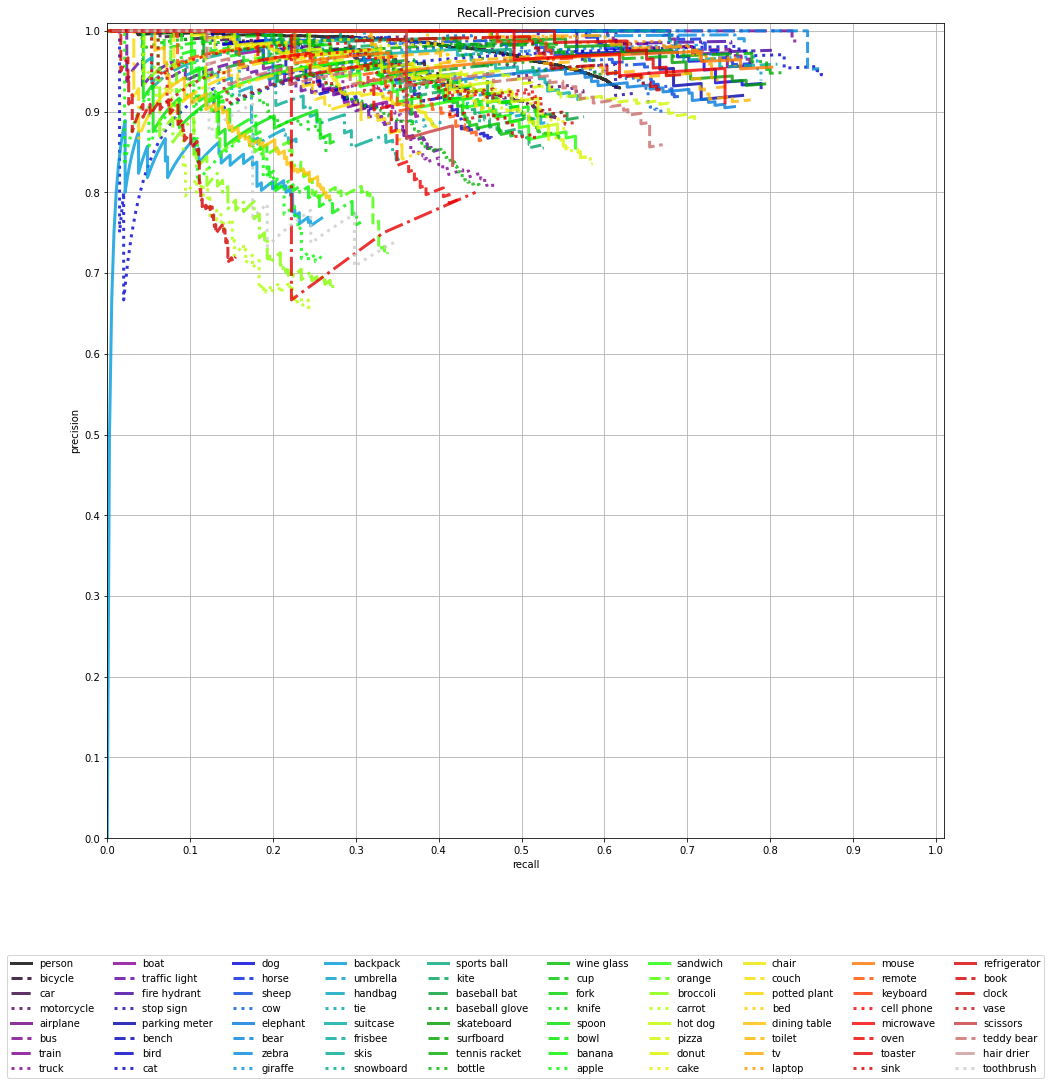

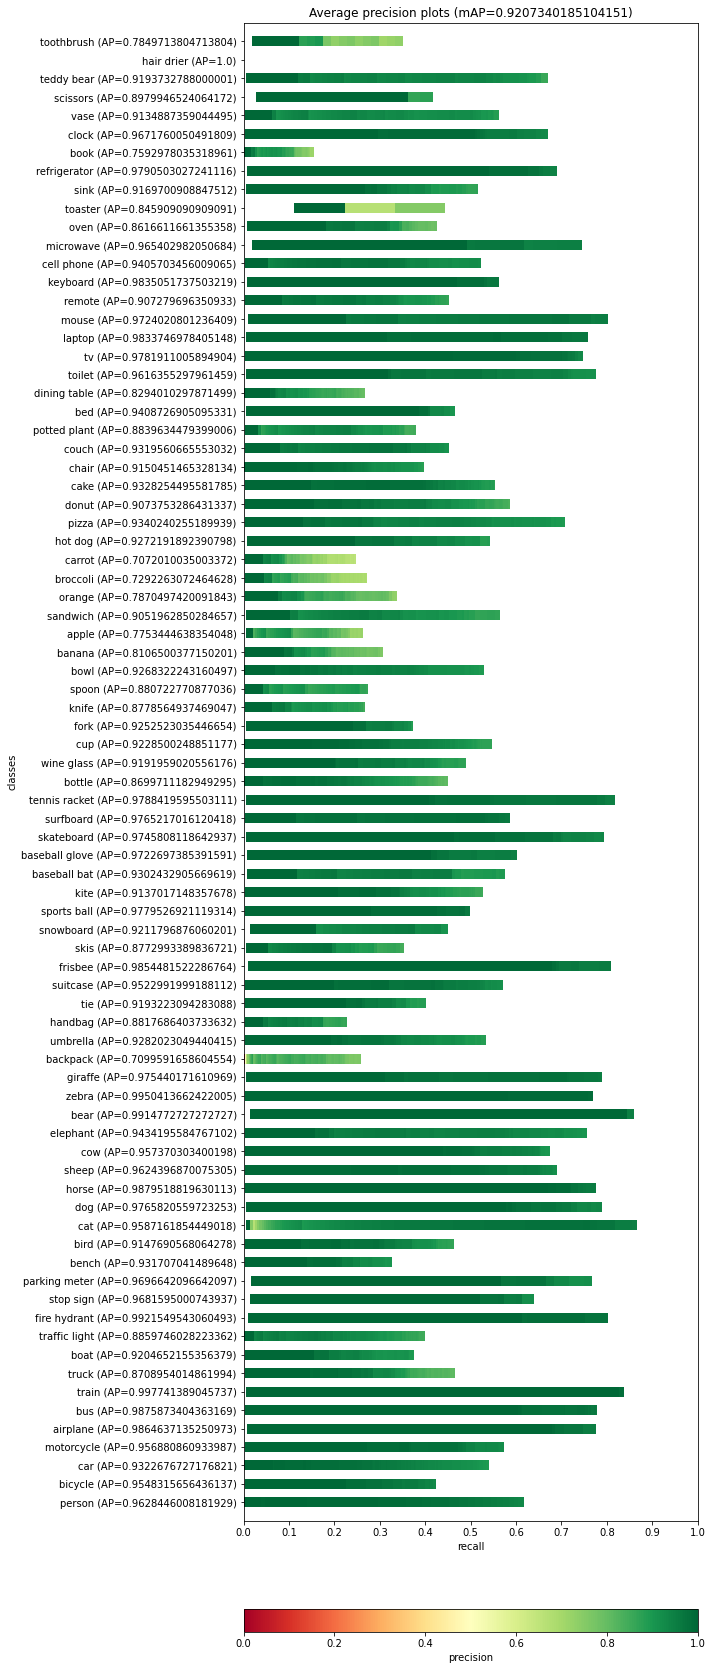

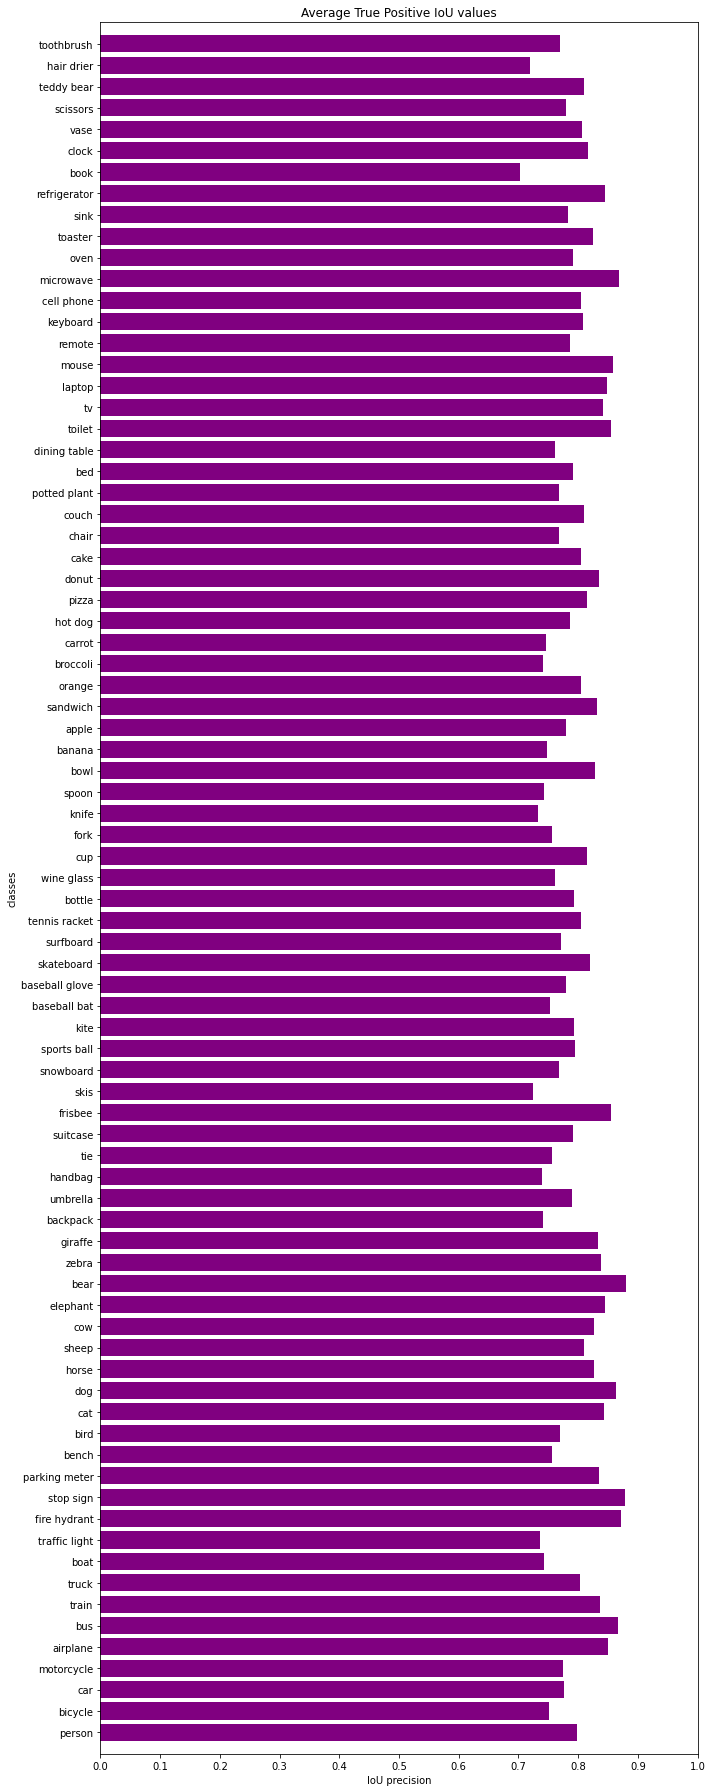

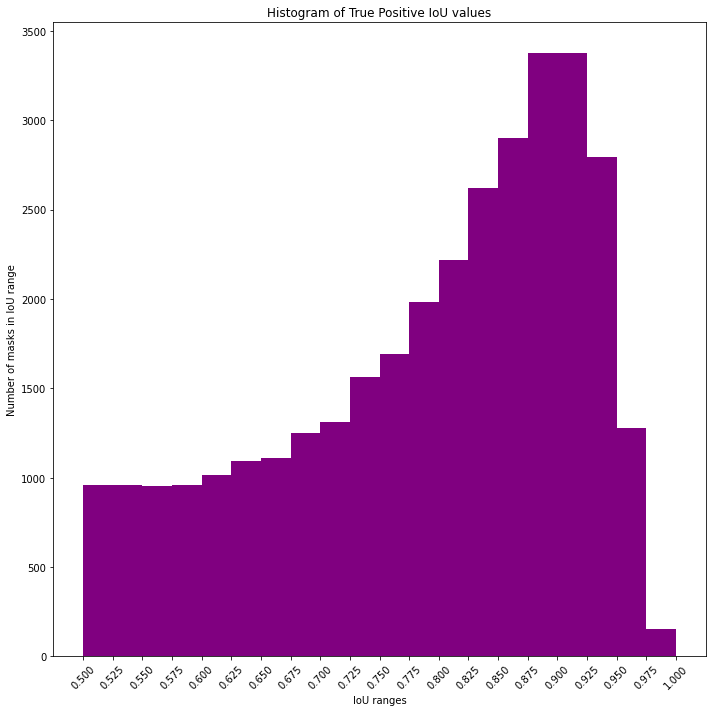

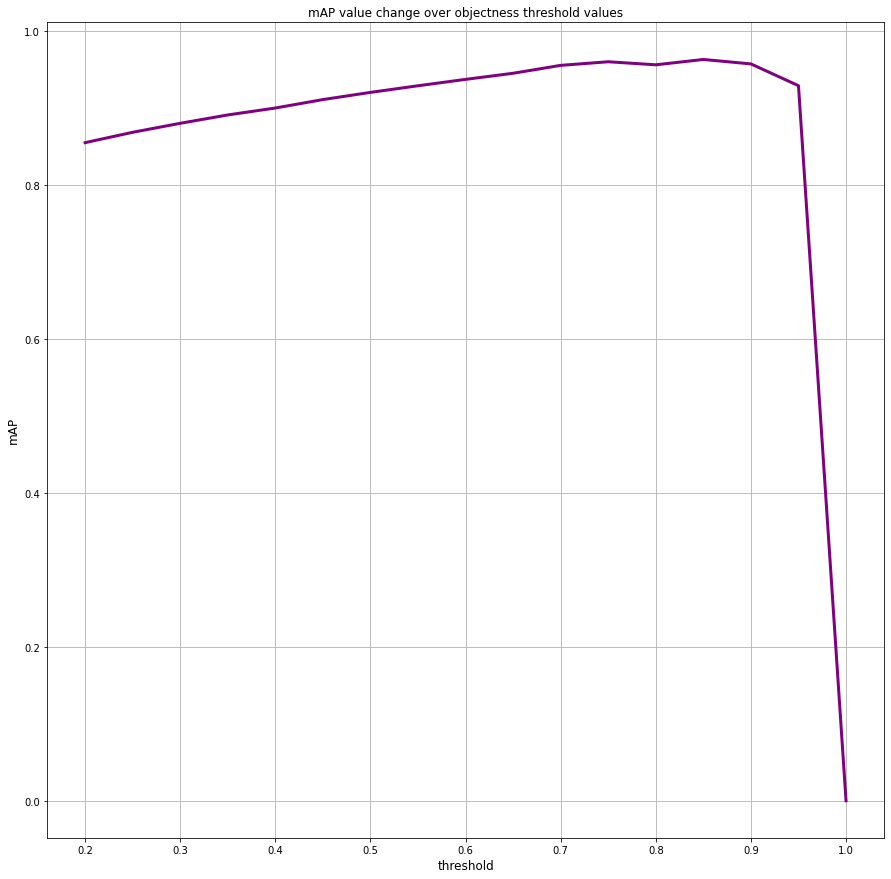

In [19]:
imgpath = OUTPUT_REPORT_PATH / 'imgs'

imgpath.mkdir(parents=True, exist_ok=True)

generate_report(
    'sample-plots',
    data,
    OUTPUT_REPORT_PATH / 'report.rst',
    OUTPUT_REPORT_PATH / 'imgs',
    ['detection'],
    OUTPUT_REPORT_PATH
)

The above plots will be available under:

In [35]:
str(imgpath)

'build/sample-plots/imgs'